# Influence of the optimization steps.

* `gobj_change` Change of the graph objective (Is X percent higher than without optimization)
* `pobj_change` Same but for polygon objective
* `gobj_opt_gap` Gap to the lower bound. X percent above lower bound.
* `cc_opt_steps` Number of cc-optimization iterations
* `t_opt_steps` Number of t-optimization iterations

In [1]:

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
from _utils import quick_plot_setup

quick_plot_setup(use_tex=False)

In [3]:
data = pd.read_json("./02c_prepared_data.json")
data = data[data["solver"].str.contains("t_opt_size=50")]
from utils import show_solver_diffs

show_solver_diffs(data)

Solver 0:  cc_opt_steps=0, t_opt_steps=0 with 500 entries
Solver 1:  cc_opt_steps=10, t_opt_steps=0 with 500 entries
Solver 2:  cc_opt_steps=25, t_opt_steps=0 with 500 entries
Solver 3:  cc_opt_steps=50, t_opt_steps=0 with 500 entries
Solver 4:  cc_opt_steps=100, t_opt_steps=0 with 500 entries
Solver 5:  cc_opt_steps=200, t_opt_steps=0 with 500 entries
Solver 6:  cc_opt_steps=0, t_opt_steps=10 with 500 entries
Solver 7:  cc_opt_steps=0, t_opt_steps=25 with 500 entries
Solver 8:  cc_opt_steps=0, t_opt_steps=50 with 500 entries
Solver 9:  cc_opt_steps=0, t_opt_steps=100 with 500 entries
Solver 10:  cc_opt_steps=0, t_opt_steps=200 with 500 entries


In [4]:
data.sort_values(["solver"], inplace=True, ascending=True)
data.sort_values(
    ["t_opt_steps", "cc_opt_steps"], inplace=True, ascending=True, kind="stable"
)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


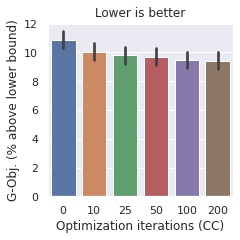

In [5]:
plt.figure(figsize=(3.5, 3.5))
plt.title("Lower is better")
sns.barplot(data=data[data["t_opt_steps"] == 0], x="cc_opt_steps", y="gobj_opt_gap")
plt.ylabel("G-Obj. (% above lower bound)")
plt.xlabel("Optimization iterations (CC)")
plt.tight_layout()
plt.savefig("./03b_cc_opt.pdf")
plt.show()

In [6]:
t = data[data["t_opt_steps"] == 0].groupby(["cc_opt_steps"])["gobj_opt_gap"].mean()
t[10] / t[0]

0.9235974525424636

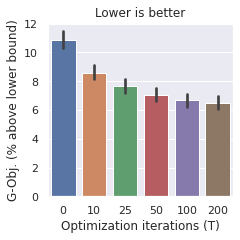

In [7]:
plt.figure(figsize=(3.5, 3.5))
sns.barplot(data=data[data["cc_opt_steps"] == 0], x="t_opt_steps", y="gobj_opt_gap")
plt.title("Lower is better")
plt.ylabel("G-Obj. (% above lower bound)")
plt.xlabel("Optimization iterations (T)")
plt.tight_layout()
plt.savefig("./03c_t_opt.pdf")
plt.show()

In [8]:
t = data[data["cc_opt_steps"] == 0].groupby(["t_opt_steps"])["gobj_opt_gap"].mean()
t[10] / t[0]

0.7895916128664049

/home/ANONYMOUS_USER/anaconda3/envs/turncost/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


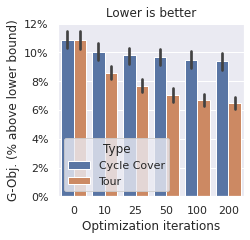

In [13]:
plt.figure(figsize=(3.5, 3.5))
t0 = data[data["cc_opt_steps"] == 0].copy()
t0["Type"] = "Tour"
t0["opt_steps"] = t0["t_opt_steps"]
t1 = data[data["t_opt_steps"] == 0].copy()
t1["Type"] = "Cycle Cover"
t1["opt_steps"] = t1["cc_opt_steps"]
t = pd.concat([t0, t1], ignore_index=True)
t.sort_values(["Type"], inplace=True)
sns.barplot(data=t, x="opt_steps", y="gobj_opt_gap", hue="Type")
plt.title("Lower is better")
plt.ylabel("G-Obj. (% above lower bound)")
plt.xlabel("Optimization iterations")
plt.tight_layout()
ax = plt.gca()
ax.set_yticklabels([f"{int(s)}%" for s in ax.get_yticks()])
plt.savefig("./03e_opt_steps.pdf")
plt.show()

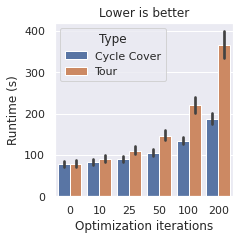

In [10]:
plt.figure(figsize=(3.5, 3.5))
t0 = data[data["cc_opt_steps"] == 0].copy()
t0["Type"] = "Tour"
t0["opt_steps"] = t0["t_opt_steps"]
t1 = data[data["t_opt_steps"] == 0].copy()
t1["Type"] = "Cycle Cover"
t1["opt_steps"] = t1["cc_opt_steps"]
t = pd.concat([t0, t1], ignore_index=True)
t.sort_values(["Type"], inplace=True)
sns.barplot(data=t, x="opt_steps", y="runtime", hue="Type")
plt.title("Lower is better")
plt.ylabel("Runtime (s)")
plt.xlabel("Optimization iterations")
plt.tight_layout()
plt.savefig("./03d_runtime_steps.pdf")
plt.show()

/home/ANONYMOUS_USER/anaconda3/envs/turncost/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


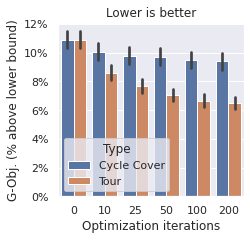

In [11]:
plt.figure(figsize=(3.5, 3.5))
t0 = data[data["cc_opt_steps"] == 0].copy()
t0["Type"] = "Tour"
t0["opt_steps"] = t0["t_opt_steps"]
t1 = data[data["t_opt_steps"] == 0].copy()
t1["Type"] = "Cycle Cover"
t1["opt_steps"] = t1["cc_opt_steps"]
t = pd.concat([t0, t1], ignore_index=True)
t.sort_values(["Type"], inplace=True)
sns.barplot(data=t, x="opt_steps", y="gobj_opt_gap", hue="Type")
plt.title("Lower is better")
plt.ylabel("G-Obj. (% above lower bound)")
plt.xlabel("Optimization iterations")
plt.tight_layout()
ax = plt.gca()
ax.set_yticklabels([f"{int(s)}%" for s in ax.get_yticks()])
plt.savefig("./03e_opt_steps.pdf")
plt.show()

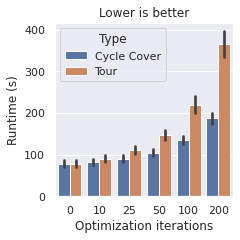

In [12]:
plt.figure(figsize=(3.5, 3.5))
t0 = data[data["cc_opt_steps"] == 0].copy()
t0["Type"] = "Tour"
t0["opt_steps"] = t0["t_opt_steps"]
t1 = data[data["t_opt_steps"] == 0].copy()
t1["Type"] = "Cycle Cover"
t1["opt_steps"] = t1["cc_opt_steps"]
t = pd.concat([t0, t1], ignore_index=True)
t.sort_values(["Type"], inplace=True)
sns.barplot(data=t, x="opt_steps", y="runtime", hue="Type")
plt.title("Lower is better")
plt.ylabel("Runtime (s)")
plt.xlabel("Optimization iterations")
plt.tight_layout()
plt.savefig("./03d_runtime_steps.pdf")
plt.show()